<a href="https://colab.research.google.com/github/Nore-gibhub/Challenge_Alura_Store/blob/main/Challenge_Alura_Store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. Análisis de facturación1.**

##**Carga de datos**

In [16]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()



,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


##**Ingreso Total por cada tienda**

####En este primer análisis, debes calcular el ingreso total de cada tienda. Sumando los valores de la columna Precio de cada conjunto de datos de la tienda para estimar los ingresos.

###Pasos
####1.   Combinar tablas
####2.   Agrupar y sumar


In [17]:
tienda['tiendas']='tienda1'
tienda2['tiendas']='tienda2'
tienda3['tiendas']='tienda3'
tienda4['tiendas']='tienda4'

df_total = pd.concat([tienda,tienda2,tienda3,tienda4])
df_total.sample(5)


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,tiendas
98,Armario,Muebles,476400.0,23600.0,16/10/2022,Izabela de León,Medellín,5,Tarjeta de crédito,3,6.25184,-75.56359,tienda4
1667,Lavavajillas,Electrodomésticos,982000.0,53000.0,06/05/2022,Mariana Herrera,Medellín,1,Tarjeta de crédito,1,6.25184,-75.56359,tienda3
2033,Cubertería,Artículos para el hogar,39000.0,2300.0,20/03/2020,Pedro Gomez,Pereira,4,Nequi,1,4.81333,-75.69611,tienda2
185,Guitarra eléctrica,Instrumentos musicales,872600.0,47100.0,21/02/2021,Beatriz Morales,Barranquilla,3,Tarjeta de crédito,4,10.96854,-74.78132,tienda3
2298,Mochila,Deportes y diversión,112000.0,4100.0,10/10/2022,Mariana Herrera,Cali,5,Cupón,1,3.43722,-76.52250,tienda1


In [27]:
ingreso_por_tienda = df_total.groupby('tiendas')['Precio'].sum()
ingreso_formateado = ingreso_por_tienda.map('${:,.0f}'.format)

Porcentaje_de_ventas_por_tienda = (ingreso_por_tienda / ingreso_por_tienda.sum()) * 100
porcentaje_formateado = Porcentaje_de_ventas_por_tienda.map('{:.1f}%'.format)

print(ingreso_formateado)
print(' ')
print(porcentaje_formateado)


tiendas
tienda1    $1,150,880,400
tienda2    $1,116,343,500
tienda3    $1,098,019,600
tienda4    $1,038,375,700
Name: Precio, dtype: object
 
tiendas
tienda1    26.1%
tienda2    25.4%
tienda3    24.9%
tienda4    23.6%
Name: Precio, dtype: object


##**Ventas por categoría**

####En este debes calcular la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

###Paso


1.   Agrupar y contar



In [19]:
#Cantidad de productos vendidos por cada categoría
ventas_por_tienda_cat = df_total.groupby(['tiendas', 'Categoría del Producto']).size().reset_index(name='Cantidad_Vendida')
ventas_ordenadas = ventas_por_tienda_cat.sort_values(by=['tiendas','Cantidad_Vendida'], ascending=[True,False])
print('Cantidad de productos vendidos por categoría en cada tienda')
print(ventas_ordenadas)
print(' ')

#Categorías mas polulares de cada tienda
idx_max = ventas_ordenadas.groupby('tiendas')['Cantidad_Vendida'].idxmax()
Cat_mas_vendidos_por_tienda = ventas_ordenadas.loc[idx_max]
print('Categorías más populares de cada tienda')
print(Cat_mas_vendidos_por_tienda)


Cantidad de productos vendidos por categoría en cada tienda
    tiendas   Categoría del Producto  Cantidad_Vendida
7   tienda1                  Muebles               465
3   tienda1             Electrónicos               448
5   tienda1                 Juguetes               324
2   tienda1        Electrodomésticos               312
1   tienda1     Deportes y diversión               284
4   tienda1   Instrumentos musicales               182
6   tienda1                   Libros               173
0   tienda1  Artículos para el hogar               171
15  tienda2                  Muebles               442
11  tienda2             Electrónicos               422
13  tienda2                 Juguetes               313
10  tienda2        Electrodomésticos               305
9   tienda2     Deportes y diversión               275
12  tienda2   Instrumentos musicales               224
14  tienda2                   Libros               197
8   tienda2  Artículos para el hogar               181
23  t

##**Valoración media por tienda**

####En este paso, debes calcular las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.



In [33]:
Calificacion_prom_por_tienda = df_total.groupby('tiendas')['Calificación'].mean()
Redondeado = round(Calificacion_prom_por_tienda,3)
print(Redondeado)

tiendas
tienda1    3.977
tienda2    4.037
tienda3    4.048
tienda4    3.996
Name: Calificación, dtype: float64


##**Productos más vendidos y menos vendidos**

####En este paso, debes identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda. Visualiza los resultados para que quede claro qué productos destacaron en ventas en cada tienda.

In [21]:
ventas_por_tienda_producto = df_total.groupby(['tiendas', 'Producto']).size().reset_index(name='Cantidad_Vendida')

# Encuentra el producto más vendido para cada tienda
idx_max = ventas_por_tienda_producto.groupby('tiendas')['Cantidad_Vendida'].idxmax()
productos_mas_vendidos_por_tienda = ventas_por_tienda_producto.loc[idx_max]
print("Productos más vendidos por tienda:")
print(productos_mas_vendidos_por_tienda)
print(' ')

# Encuentra el producto menos vendido para cada tienda
idx_min = ventas_por_tienda_producto.groupby('tiendas')['Cantidad_Vendida'].idxmin()
productos_menos_vendidos_por_tienda = ventas_por_tienda_producto.loc[idx_min]
print("Productos menos vendidos por tienda:")
print(productos_menos_vendidos_por_tienda)

Productos más vendidos por tienda:
     tiendas                   Producto  Cantidad_Vendida
1    tienda1                    Armario                60
75   tienda2  Iniciando en programación                65
129  tienda3              Kit de bancas                57
163  tienda4                   Cama box                62
 
Productos menos vendidos por tienda:
     tiendas                   Producto  Cantidad_Vendida
4    tienda1  Auriculares con micrófono                33
77   tienda2              Juego de mesa                32
111  tienda3    Bloques de construcción                35
175  tienda4         Guitarra eléctrica                33


##**Valor del envío promedio por tienda**

####En este paso, debes calcular el costo de envío promedio para cada tienda. El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda.  Sabiendo que el cliente paga el envío.

In [22]:
Cost_prom_de_envio = df_total.groupby('tiendas')['Costo de envío'].mean()
print(Cost_prom_de_envio)

tiendas
tienda1    26018.609580
tienda2    25216.235693
tienda3    24805.680373
tienda4    23459.457167
Name: Costo de envío, dtype: float64


#**2. ANÁLISIS CON GRÁFICOS**

##**Ventas por cada tienda**

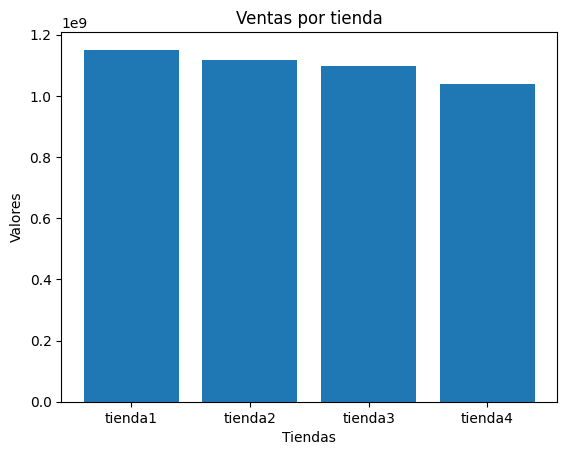

In [23]:
from matplotlib import pyplot as plt
plt.xlabel('Tiendas')
plt.ylabel('Valores')
plt.title('Ventas por tienda')
plt.bar(x=ingreso_por_tienda.index, height=ingreso_por_tienda.values)
plt.show()

##**Valoración media por tienda**


tiendas
tienda1    3.976685
tienda2    4.037304
tienda3    4.048326
tienda4    3.995759
Name: Calificación, dtype: float64


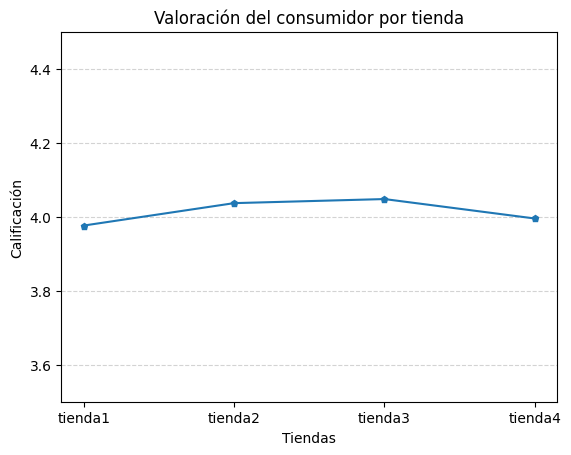

In [24]:
from matplotlib import pyplot as plt
x = Calificacion_prom_por_tienda.index
y = Calificacion_prom_por_tienda.values
plt.xlabel('Tiendas')
plt.ylabel('Calificación')
plt.title('Valoración del consumidor por tienda')
plt.ylim(ymin=3.5, ymax=4.5)
plt.grid(color="lightgray",linestyle="--", axis="y")
plt.plot(x,y, marker='p', markersize=5 )
print(Calificacion_prom_por_tienda)
plt.show()


##**Costo de envío**

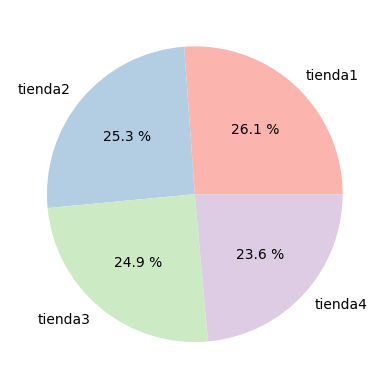

In [25]:
from matplotlib import pyplot as plt

A = Cost_prom_de_envio.index
B = Cost_prom_de_envio.values
cmap = plt.get_cmap('Pastel1')
colores_cmap = cmap(range(len(A)))


plt.pie(B, labels=A, colors=colores_cmap, autopct="%0.1f %%")
plt.show()

##**Última Fecha de compra por tienda**

tiendas
tienda1   2023-03-31
tienda2   2023-03-31
tienda3   2023-03-31
tienda4   2023-03-30
Name: Fecha de Compra, dtype: datetime64[ns]
 


/tmp/ipython-input-2842824680.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_total['Fecha de Compra'] = pd.to_datetime(df_total['Fecha de Compra'])


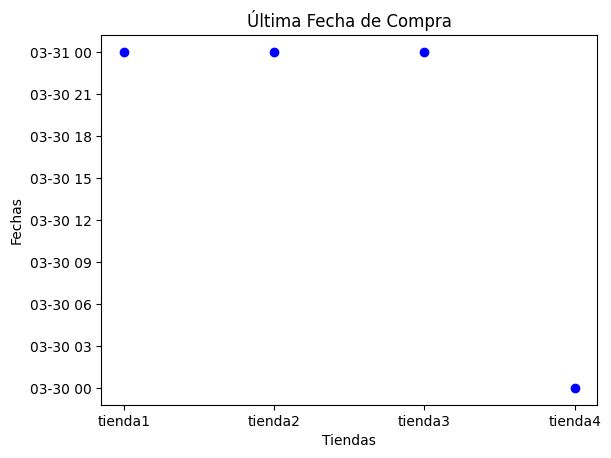

In [26]:
df_total['Fecha de Compra'] = pd.to_datetime(df_total['Fecha de Compra'])
ultima_venta_por_tienda = df_total.groupby('tiendas')['Fecha de Compra'].max()
print(ultima_venta_por_tienda)
print(' ')
#df_ordenado = df_total.sort_values(by='Fecha de Compra',ascending=False)
#tiendas_ordenadas_unicas = df_ordenado['tiendat'].unique()
#print(df_ordenado[['tiendat','Fecha de Compra','Producto']].head())

from matplotlib import pyplot as plt
x = ultima_venta_por_tienda.index
y = ultima_venta_por_tienda.values
fig, ax = plt.subplots()

ax.scatter(x, y, color='blue')
ax.set_xlabel('Tiendas')
ax.set_ylabel('Fechas')
plt.title('Última Fecha de Compra')

plt.show()

#**INFORME DE RESULTADOS**


Estimado Sr. Juan,


Luego de un análisis exhaustivo de los datos de las 4 tiendas de la cadena Alura Store, con el objetivo de poder realizar una recomendación sobre la tienda que debería vender, se detalla lo siguiente:


1. Se analizaron los ingresos totales de la cadena, siendo la tienda que aportó menos ingresos la tienda 4 cuyas ventas fueron un 24% del total, mientras se mantiene en el 1er lugar de ventas la tienda 1 con un 26%, seguido por las tiendas 2 y 3 con un 25% respectivamente.

2. Se evaluó la calificación promedio de cada tienda, para conocer la opinión de los consumidores, siendo las tiendas muy similares en valoración, sin embargo, las calificaciones posicionan las tiendas de la siguiente manera de la peor a la mejor valorada:
Tienda1(3.97pts), Tienda4(3.99pts),Tienda2(4.03ptspts), Tienda3(4.04pts). Resaltando que la Tienda4 esta entre las menos valoradas.

3. En cuanto a Categorías más vendidas para todas las tiendas destaca la categoría muebles siendo la Tienda3 la que concentra las mayores ventas en esta categoría, mientras que el producto más vendido

3. En cuanto a costos de envío aun cuando la Tienda4 es la que mantiene los costos de envíos mas bajos, no es la mejor calificada y ni la que representa las mayores ventas.

###**Recomendación:**
Teniendo en cuenta los resultados presentados anteriormente se recomienda vender la **Tienda4**, ya que es la que presenta las menores ventas según el período evaluado, la calificación del consumidor la situa entre una de las menos valoradas y llegó a registrar 0 ventas en almenos un día lo que impacta significativamente en los ingresos de la cadena.